In [3]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

from caiman_main import SimulateAcq
from utils import tic, toc, ptoc, remove_artifacts, mm3d_to_img 

In [4]:
# # make a structural image
# # can do however you want, just needs to be an image that matches the X dims in image_params (100,400)

# mm3d_file = glob('E:/caiman_scratch/template/*.mat')[0]
# mm3d_img = mm3d_to_img(mm3d_file, chan=0)

# # below should work on any image
# structural_image = remove_artifacts(mm3d_img, 100, 400)
# structural_image = structural_image[0,:,:] # select for only top plane in image

# plt.imshow(structural_image)

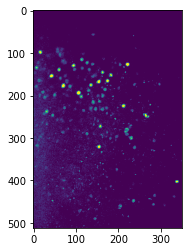

In [5]:
from glob import glob 
import imageio
import cv2

user_name = 'Mora'
x_start = 100
x_end = 450
date = '20200802'
mouse = 'MBOT5_419'
exp_name = 'ori'



tif_folder = 'D://'+ user_name + '//' + date +'//' + mouse + '//' + exp_name + '//'
reference_folder ='D://' + user_name +'//'+ date +'//'+ mouse +'//'+ 'reference' + '//'
image_path = glob(reference_folder + '*.png')[0]


mR= imageio.imread(image_path)
image = mR[:,x_start:x_end,0]
cv2.imwrite(reference_folder + 'caiman_template.png',image)
plt.imshow(image)

In [6]:
reference_folder

'D://Mora//20200802//MBOT5_419//reference//'

In [7]:
suite2p_path = 'D://Mora//20200802//MBOT5_419//ori//suite2p//plane0//'
seed = np.load(suite2p_path+'seeding_template_caiman.npy')

In [8]:
seed.shape

(179200, 389)

In [9]:
dxy = (1.5, 1.5) # spatial resolution in x and y in (um per pixel)
max_shift_um = (12., 12.) # maximum shift in um
patch_motion_xy = (25., 25.) # patch size for non-rigid correction in um

image_params = {
    'channels': 2,
    'planes': 1,
    'x_start': x_start,
    'x_end': x_end,
    'folder': tif_folder, # this is where the tiffs are
    'chunk_size': 300, # number of tiffs to do at once: we recommend around 4000 frames
    'structural_img': image,
    'seed': seed #added to use external seeding
}

caiman_params = {
    'fr': 15,  # imaging rate in frames per second, per plane
    'overlaps': (24, 24),
    'max_deviation_rigid': 3,
    'p': 2,  # deconv 0 is off, 1 is slow, 2 is fast
    'nb': 3,  # background compenents -> nb: 3 for complex
    'decay_time': 1.0,  # sensor tau
    'gSig': (7, 7),  # expected half size of neurons in pixels, very important for proper component detection
    'only_init': False,  # has to be `False` when seeded CNMF is used
    'rf': None,  # half-size of the patches in pixels. Should be `None` when seeded CNMF is used.
    'pw_rigid': True,  # piece-wise rigid flag
    'ssub': 1,
    'tsub': 1,
    'merge_thr': 0.99, # cells with this or higher correlation will be merged
    'num_frames_split': 20,
    'border_nan': 'copy',
    'max_shifts': [int(a/b) for a, b in zip(max_shift_um, dxy)],
    'strides': tuple([int(a/b) for a, b in zip(patch_motion_xy, dxy)])
}

In [10]:
expt = SimulateAcq(caiman_params, **image_params)
expt.run_fake_expt()

Seeding with a previously segmented template...
Setting up caiman...
Starting local cluster... done.
Removed D://Mora//20200802//MBOT5_419//ori\FINAL_d1_512_d2_350_d3_1_order_C_frames_18000_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0000_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0001_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0002_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0003_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0004_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0005_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0006_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0007_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_41

Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0237_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0238_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a0239_d1_512_d2_350_d3_1_order_C_frames_75_.mmap
Removed D://Mora//20200802//MBOT5_419//ori\MAP0a_d1_512_d2_350_d3_1_order_C_frames_18000_.mmap
Nothing to remove!
Nothing to remove!
Memory mapping current file... done. Took 119.5449s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 145.7813s
processing files: ['D://Mora//20200802//MBOT5_419//ori\\ori_MBOt5_419_920nm_40p_z150_zoom1p5_00001.tif', 'D://Mora//20200802//MBOT5_419//ori\\ori_MBOt5_419_920nm_40p_z150_zoom1p5_00002.tif', 'D://Mora//20200802//MBOT5_419//ori\\ori_MBOt5_419_920nm_40p_z150_zoom1p5_00003.tif', 'D://Mora//20200802//MBOT5_419//ori\\ori_MBOt5_419_920nm_40p_z150_zoom1p5_00004.tif', 'D://Mora//20200802//MBOT5_419//ori\\

spatial support for each components given by the user
CNMF fitting done. Took 191.0148s
Caiman online analysis done.


In [ ]:
seed.all() == None

In [ ]:
1

In [ ]:
1